In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import regex as re
import contractions


In [2]:
fake_news_df = pd.read_csv("../Resources/news.csv")
fake_news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
fake_news_df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [4]:
fake_news_df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
fake_news_df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
fake_news_df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [7]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [8]:
##https://towardsdatascience.com/primer-to-cleaning-text-data-7e856d6e5791

stopword_list = nltk.corpus.stopwords.words('english')

from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer( )
def remove_stopwords(text, is_lower_case=False):
     tokens = tokenizer.tokenize(text)
     tokens = [token.strip( ) for token in tokens] # List comprehension: loop through every token and strip white space
     filtered_tokens = [token for token in tokens if token not in stopword_list] # Keep only the non stop word tokens in the list
     filtered_text = ' '.join(filtered_tokens) # join all those tokens using a space as a delimiter
    
     return filtered_text

In [9]:
cleaned_text_list = []

for text in fake_news_df['text']:
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub('[^a-zA-z0-9\s]', '' , text)
    text = text.translate(str.maketrans('','',string.punctuation))
    filtered = remove_stopwords(text)
    cleaned_text_list.append(filtered)


In [10]:
cleaned_title_list = []

for title in fake_news_df['title']:
    title = contractions.fix(title)
    title = title.lower()
    title = re.sub('[^a-zA-z0-9\s]', '' , title)
    title = title.translate(str.maketrans('','',string.punctuation))
    filtered = remove_stopwords(title)
    cleaned_title_list.append(filtered)


In [11]:
fake_news_df['cleaned_title'] = cleaned_title_list
fake_news_df['cleaned_text'] = cleaned_text_list
fake_news_df.head()

,title,text,label,cleaned_title,cleaned_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,smell hillarys fear,daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry go paris gesture sympathy,yous secretary state john f kerry said monday ...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,battle new york primary matters,primary day new york frontrunners hillary clin...


In [12]:
fake_news_df.describe()

,title,text,label,cleaned_title,cleaned_text
count,6335,6335,6335,6335,6335
unique,6256,6060,2,6220,6058
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL,onpolitics politics blog,killing obama administration rules dismantling...
freq,5,58,3171,5,58


In [13]:
title_unique_list = []
for t in fake_news_df['cleaned_title']:
    new_set = set(t.split())
    uniques = len(new_set)
    title_unique_list.append(uniques)

text_unique_list = []
for t in fake_news_df['cleaned_text']:
    new_set = set(t.split())
    uniques = len(new_set)
    text_unique_list.append(uniques)

In [14]:
fake_news_df['title_unique'] = title_unique_list
fake_news_df['text_unique'] = text_unique_list
fake_news_df.head()

,title,text,label,cleaned_title,cleaned_text,title_unique,text_unique
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,smell hillarys fear,daniel greenfield shillman journalism fellow f...,3,443
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,11,207
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry go paris gesture sympathy,yous secretary state john f kerry said monday ...,5,179
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...,8,194
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,battle new york primary matters,primary day new york frontrunners hillary clin...,5,121


In [19]:
target_list = []

for i in fake_news_df['label']:
    if i == "FAKE":
        target_list.append(1)
    else:
        target_list.append(0)

fake_news_df['target'] = target_list
fake_news_df.head()

,title,text,label,cleaned_title,cleaned_text,title_unique,text_unique,target
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,smell hillarys fear,daniel greenfield shillman journalism fellow f...,3,443,1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,11,207,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry go paris gesture sympathy,yous secretary state john f kerry said monday ...,5,179,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...,8,194,1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,battle new york primary matters,primary day new york frontrunners hillary clin...,5,121,0


<AxesSubplot:xlabel='Unique Words In Text', ylabel='Unique Words In Title'>

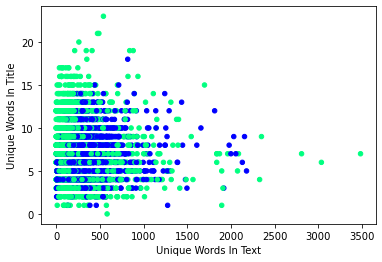

In [30]:
unique_words_df = fake_news_df[['title_unique','text_unique','target']]
unique_words_df.plot(
    kind='scatter',
    x='text_unique', 
    y='title_unique',
    c='target', 
    colormap='winter', 
    colorbar=False,
    xlabel='Unique Words In Text',
    ylabel='Unique Words In Title'
    )